In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/Users/lenevo/Desktop/PythonAI/Brain Stroke/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [4]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
dummy = pd.get_dummies(df['gender'])

In [7]:
dummy

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
4976,0,1
4977,0,1
4978,1,0
4979,0,1


In [8]:
df2 = pd.concat([df,dummy],axis=1)

In [9]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,0,1
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,0,1
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,1,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,0,1


In [10]:
df2 = df2.drop(['gender','Female'],axis = 1)

In [11]:
df2

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
2,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
3,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
4,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,1
4977,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,1
4978,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,0
4979,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,1


In [14]:
df2 = df2.rename(columns={'Male':'gender'})

In [15]:
df2.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
2,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
3,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
4,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1


Gender column shows male value as 1 and female value as 0

In [16]:
df2['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [17]:
dummy = pd.get_dummies(df['ever_married'])

In [18]:
dummy

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4976,1,0
4977,0,1
4978,0,1
4979,0,1


In [19]:
df2 = pd.concat([df2,dummy],axis=1)

In [21]:
df2.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,No,Yes
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1
1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0,1
2,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,0,1
3,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,1
4,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0,1


In [22]:
df2 = df2.drop(['ever_married','No'],axis = 1)

In [23]:
df2.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,Yes
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1,1
2,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,1
3,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1
4,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,1,1


In [25]:
df2 = df2.rename(columns={'Yes':'married'})
df2.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,married
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1,1
2,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,1
3,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1
4,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,1,1


Married column shows 1 as yes married and 0 as not married

In [26]:
df2['Residence_type'].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [27]:
dummy = pd.get_dummies(df['Residence_type'])
dummy.head()

,Rural,Urban
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [28]:
df2 = pd.concat([df2,dummy],axis = 1)

In [29]:
df2.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,married,Rural,Urban
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0,1
1,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1,1,1,0
2,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,1,0,1
3,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,1,0
4,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,1,1,0,1


In [30]:
df2 = df2.drop(['Residence_type','Rural'],axis=1)

In [31]:
df2.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender,married,Urban
0,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,1
1,80.0,0,1,Private,105.92,32.5,never smoked,1,1,1,0
2,49.0,0,0,Private,171.23,34.4,smokes,1,0,1,1
3,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,1,0
4,81.0,0,0,Private,186.21,29.0,formerly smoked,1,1,1,1


In [32]:
df2 = df2.rename(columns={'Urban':'residance_type'})
df2.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender,married,residance_type
0,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,1
1,80.0,0,1,Private,105.92,32.5,never smoked,1,1,1,0
2,49.0,0,0,Private,171.23,34.4,smokes,1,0,1,1
3,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,1,0
4,81.0,0,0,Private,186.21,29.0,formerly smoked,1,1,1,1


Residence type shows value 1 as Urban and 0 as Rural

In [33]:
df2['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [34]:
df2['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

[]

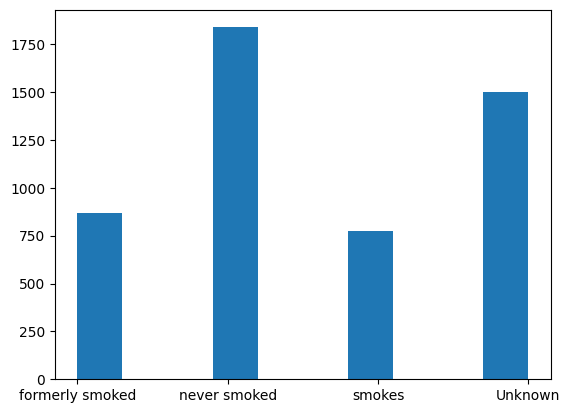

In [44]:
%matplotlib inline
plt.hist(df2['smoking_status'])
plt.plot()

In [45]:
dummy = pd.get_dummies(df['smoking_status'])
dummy.head()

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [46]:
df2 = pd.concat([df2,dummy],axis=1)

In [48]:
df2.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender,married,residance_type,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,1,0,1,0,0
1,80.0,0,1,Private,105.92,32.5,never smoked,1,1,1,0,0,0,1,0
2,49.0,0,0,Private,171.23,34.4,smokes,1,0,1,1,0,0,0,1
3,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,1,0,0,0,1,0
4,81.0,0,0,Private,186.21,29.0,formerly smoked,1,1,1,1,0,1,0,0


In [49]:
df2['smoking_status'] = np.where(df2["smoking_status"] == "Unknown", np.nan, 0)

In [50]:
df2.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender,married,residance_type,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,Private,228.69,36.6,0.0,1,1,1,1,0,1,0,0
1,80.0,0,1,Private,105.92,32.5,0.0,1,1,1,0,0,0,1,0
2,49.0,0,0,Private,171.23,34.4,0.0,1,0,1,1,0,0,0,1
3,79.0,1,0,Self-employed,174.12,24.0,0.0,1,0,1,0,0,0,1,0
4,81.0,0,0,Private,186.21,29.0,0.0,1,1,1,1,0,1,0,0


In [52]:
df2.isna().sum()

age                     0
hypertension            0
heart_disease           0
work_type               0
avg_glucose_level       0
bmi                     0
smoking_status       1500
stroke                  0
gender                  0
married                 0
residance_type          0
Unknown                 0
formerly smoked         0
never smoked            0
smokes                  0
dtype: int64

In [55]:
df2 = df2.dropna(how='any')

In [56]:
df2.isna().sum()

age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
gender               0
married              0
residance_type       0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

In [57]:
df2['Unknown'].value_counts()

0    3481
Name: Unknown, dtype: int64

In [58]:
df2 = df2.drop(['smoking_status','Unknown'],axis=1)
df2.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender,married,residance_type,formerly smoked,never smoked,smokes
0,67.0,0,1,Private,228.69,36.6,1,1,1,1,1,0,0
1,80.0,0,1,Private,105.92,32.5,1,1,1,0,0,1,0
2,49.0,0,0,Private,171.23,34.4,1,0,1,1,0,0,1
3,79.0,1,0,Self-employed,174.12,24.0,1,0,1,0,0,1,0
4,81.0,0,0,Private,186.21,29.0,1,1,1,1,1,0,0


In [59]:
joined_column = df2['formerly smoked']+df2['smokes']

In [60]:
joined_column

0       1
1       0
2       1
3       0
4       1
       ..
4976    1
4977    1
4978    1
4979    1
4980    0
Length: 3481, dtype: uint8

In [62]:
df2['smokes'] = joined_column

In [63]:
df2

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender,married,residance_type,formerly smoked,never smoked,smokes
0,67.0,0,1,Private,228.69,36.6,1,1,1,1,1,0,1
1,80.0,0,1,Private,105.92,32.5,1,1,1,0,0,1,0
2,49.0,0,0,Private,171.23,34.4,1,0,1,1,0,0,1
3,79.0,1,0,Self-employed,174.12,24.0,1,0,1,0,0,1,0
4,81.0,0,0,Private,186.21,29.0,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,Private,70.15,29.8,0,1,0,0,1,0,1
4977,40.0,0,0,Private,191.15,31.1,0,1,1,1,0,0,1
4978,45.0,1,0,Govt_job,95.02,31.8,0,0,1,0,0,0,1
4979,40.0,0,0,Private,83.94,30.0,0,1,1,0,0,0,1


In [64]:
df2 = df2.drop(['formerly smoked','never smoked'],axis=1)

In [65]:
df2.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender,married,residance_type,smokes
0,67.0,0,1,Private,228.69,36.6,1,1,1,1,1
1,80.0,0,1,Private,105.92,32.5,1,1,1,0,0
2,49.0,0,0,Private,171.23,34.4,1,0,1,1,1
3,79.0,1,0,Self-employed,174.12,24.0,1,0,1,0,0
4,81.0,0,0,Private,186.21,29.0,1,1,1,1,1


Smokes column is showing the value  1 as smoker and 0 for not smoker

We are dropping the work type column as it is not playing important role in this dataframe.

In [67]:
data = df2.drop(['work_type'],axis=1)

In [68]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,married,residance_type,smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,0,0
2,49.0,0,0,171.23,34.4,1,0,1,1,1
3,79.0,1,0,174.12,24.0,1,0,1,0,0
4,81.0,0,0,186.21,29.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1
4978,45.0,1,0,95.02,31.8,0,0,1,0,1
4979,40.0,0,0,83.94,30.0,0,1,1,0,1


<AxesSubplot:>

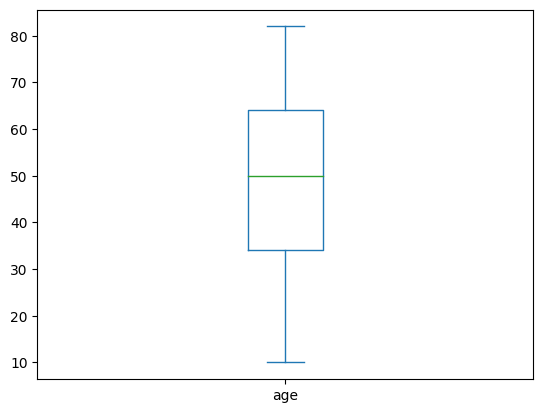

In [79]:
data['age'].plot.box()

<AxesSubplot:>

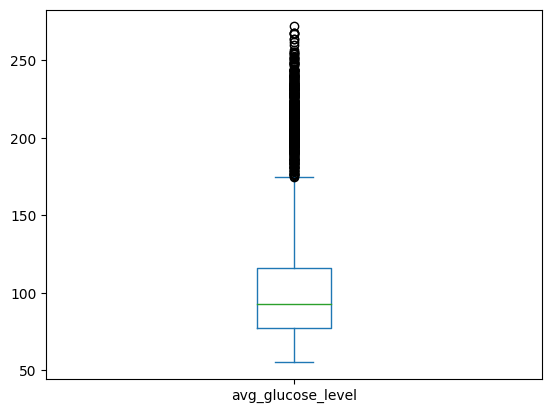

In [80]:
data['avg_glucose_level'].plot.box()

In [81]:
data['avg_glucose_level'].quantile([0.1,0.25,0.5,0.75,0.80,0.95])

0.10     65.98
0.25     77.45
0.50     92.49
0.75    116.25
0.80    130.34
0.95    220.24
Name: avg_glucose_level, dtype: float64

In [83]:
max_age = data['avg_glucose_level'].quantile([0.8])

In [84]:
max_age

0.8    130.34
Name: avg_glucose_level, dtype: float64

In [86]:
data = data[data['avg_glucose_level']<130.34]

In [87]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,married,residance_type,smokes
1,80.0,0,1,105.92,32.5,1,1,1,0,0
5,74.0,1,1,70.09,27.4,1,1,1,0,0
6,69.0,0,0,94.39,22.8,1,0,0,1,0
8,81.0,1,0,80.43,29.7,1,0,1,0,0
9,61.0,0,1,120.46,36.8,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4974,58.0,0,0,84.94,30.2,0,1,1,1,0
4976,41.0,0,0,70.15,29.8,0,1,0,0,1
4978,45.0,1,0,95.02,31.8,0,0,1,0,1
4979,40.0,0,0,83.94,30.0,0,1,1,0,1


<AxesSubplot:>

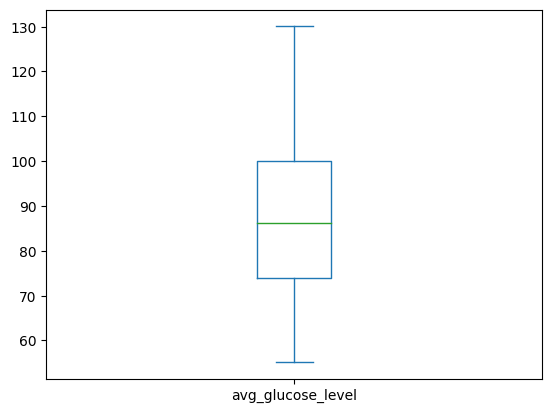

In [88]:
data['avg_glucose_level'].plot.box()

<AxesSubplot:>

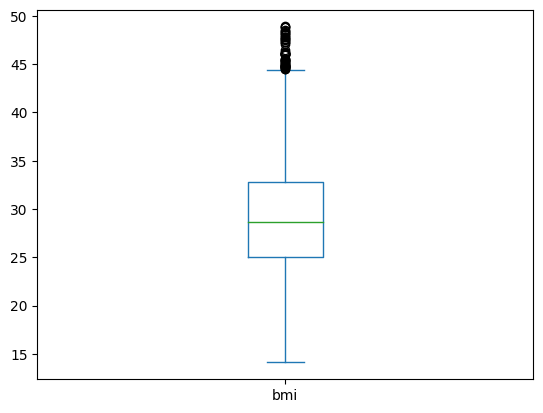

In [89]:
data['bmi'].plot.box()

In [90]:
data['bmi'].describe()

count    2784.000000
mean       29.329849
std         6.097253
min        14.100000
25%        25.000000
50%        28.700000
75%        32.800000
max        48.900000
Name: bmi, dtype: float64

In [94]:
data['bmi'].quantile([0.1,0.25,0.50,0.7,0.8,0.9,0.95])

0.10    22.0
0.25    25.0
0.50    28.7
0.70    31.8
0.80    34.1
0.90    37.9
0.95    41.1
Name: bmi, dtype: float64

In [95]:
data = data[data['bmi']<42]

In [96]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,married,residance_type,smokes
1,80.0,0,1,105.92,32.5,1,1,1,0,0
5,74.0,1,1,70.09,27.4,1,1,1,0,0
6,69.0,0,0,94.39,22.8,1,0,0,1,0
8,81.0,1,0,80.43,29.7,1,0,1,0,0
9,61.0,0,1,120.46,36.8,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4974,58.0,0,0,84.94,30.2,0,1,1,1,0
4976,41.0,0,0,70.15,29.8,0,1,0,0,1
4978,45.0,1,0,95.02,31.8,0,0,1,0,1
4979,40.0,0,0,83.94,30.0,0,1,1,0,1


<AxesSubplot:>

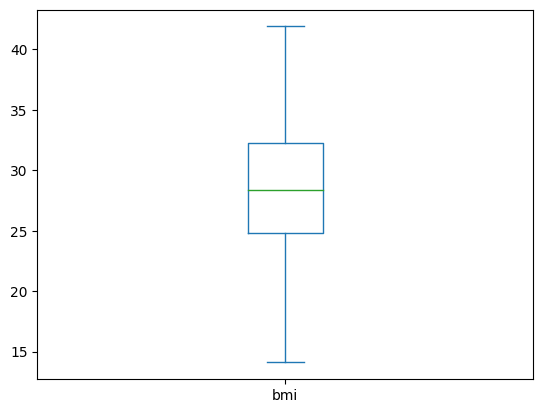

In [97]:
data['bmi'].plot.box()

In [98]:
new_df = data.drop(['stroke'],axis=1)
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,married,residance_type,smokes
1,80.0,0,1,105.92,32.5,1,1,0,0
5,74.0,1,1,70.09,27.4,1,1,0,0
6,69.0,0,0,94.39,22.8,0,0,1,0
8,81.0,1,0,80.43,29.7,0,1,0,0
9,61.0,0,1,120.46,36.8,0,1,0,1


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(new_df,data['stroke'], train_size=0.8)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [102]:
model.fit(x_train,y_train)

LogisticRegression()

In [103]:
model.score(x_test,y_test)

0.9552238805970149

1) age: age of the patient in number    
2) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension    
3) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease    
4) avgglucoselevel: average glucose level in blood    
5) bmi: body mass index in number    
6) gender : 0 for female and 1 for male    
7) married : 0 for not 1 for yes    
8) residance_type : 1 for urban and 0 for rural    
9) smokes: 0 for not 1 for yes

In [117]:
model.predict_proba(x_test)

array([[0.9690324 , 0.0309676 ],
       [0.92282048, 0.07717952],
       [0.99707407, 0.00292593],
       ...,
       [0.94078464, 0.05921536],
       [0.87399086, 0.12600914],
       [0.99636763, 0.00363237]])